# The 2 Metrics That Reveal True Data Dispersion Beyond Standard Deviation

## A guide to computing and interpreting Coefficient of Variation and Quantile Coefficient of Dispersion

This notebook is accompanying the article at https://ealizadeh.com/blog/dispersion-cv-qcd/.

Follow me at: 
- **Twitter**: https://twitter.com/es_alizadeh
- **Medium**: https://medium.com/@ealizadeh

**Copyright © 2023 Esmaeil Alizadeh**

![](https://ealizadeh.com/blog/dispersion-cv-qcd/img/_featured_image.png)


## Introduction

We've all heard the saying, "variety is the spice of life," and in data, that variety or diversity often takes the form of dispersion. 

Data dispersion makes data fascinating by highlighting patterns and insights we wouldn't have found otherwise. 
Typically, we use the following as the measures of dispersion: variance, standard deviation, range, interquantile range (IQR). However, we may need to examine dataset dispersion beyond this typical measures in cases.

This is where the Coefficient of Variation (CV) and Quartile Coefficient of Dispersion (QCD) provides insights when comparing datasets

In this tutorial, we will explore the two concepts of CV and QCD and we will answer the following questions for each of them
- What are they and how they are defined? 
- How they can be computed? 
- How to interpret the results?

All above questions will be answered through two examples. 



## Understanding Variability and Dispersion
Whether we're measuring people's heights or housing prices, we seldom find all data points to be the same. We won't expect everyone to be the same. Some people are tall, average, or short. Data generally varies. In order to study this data variability or dispersion, we usually quantify that using measures like range, variance, standard deviation, etc. The measures of dispersion quantify how spread out our data points are. 

However, what if we wish to evaluate the variability across datasets. For example, what if we want to compare the sales prices of a jewelry shop and a bookstore. Standard deviation won't work here, as the scales of the two datasets are likely very different.

Coefficient of Variation (CV) and Quartile Coefficient of Dispersion (QCD) are useful indicators of dispersion in this context.

### Deep Dive: Coefficient of Variation

The [Coefficient of Variation (CV)](https://en.wikipedia.org/wiki/Coefficient_of_variation), also known as *relative standard deviation*, is a standardized measure of dispersion. It's expressed as a percentage and doesn't have units. As a result, CV is an excellent measure of variability for comparing data in different scales.

Mathematically, CV is computed as the ratio of the standard deviation to the mean, often multiplied by 100 to get a percentage. The formula is as follows:

$$
  \text{Coefficient of Variations (CV)} = \frac{\text{Standard Deviation}}{\text{mean}} 
$$

Let's use Numpy's `mean` and `std` function to compute CV in Python.

In [1]:
#| label: def-calc_cv

def calc_cv(data_array) -> float:
  """Calculate coefficient of variation."""
  return np.std(data_array) / np.mean(data_array)

Next, let's consider another dimensionless measure of dispersion that is QCD. 

## Deep Dive: Quartile Coefficient of Dispersion

The [Quartile Coefficient of Dispersion (QCD)](https://en.wikipedia.org/wiki/Quartile_coefficient_of_dispersion) is another measure of *relative* dispersion, especially useful when dealing with skewed data or even the data has outliers. 
The QCD focuses on the spread of the middle 50% of a dataset, i.e., the interquartile range (IQR). 
That's why QCD is a robust measure.

The QCD is calculated as follows:

$$
\text{QCD} = \frac{Q3 - Q1}{Q3 + Q1}
$$

Where $Q1$ is the first quartile (the 25th percentile), and $Q3$ is the third quartile (the 75th percentile).


In [2]:
#| label: def-calc_qcd

def calc_qcd(data_array) -> float: 
  """Calculates Quartile Coefficient Difference"""
  q1, q3 = np.percentile(data_array, [25, 75])
  return (q3 - q1) / (q3 + q1)  

Similarly to the CV, the QCD is a unitless metric that may be very helpful for comparing the dispersion of skewed datasets.

The following examples will better demonstrate the idea behind CV and QCD. 

## Examples

### Scenario 1: 

Consider the following two datasets showing the monthly sales of a jewelry shop and a bookstore.

- Jewelry shop: The average monthly sales are $10,000 with a standard deviation of $2,000.
- Bookstore: The average monthly sales are $1,000 with a standard deviation of $200.

Let's generate sample data for both examples using Numpy.

In [3]:
#| label: data-ex1-cv

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context="notebook", style="whitegrid", palette="deep")

np.random.seed(0) # Setting a seed for reproducibility

jewelry_sales = np.random.normal(loc=10000, scale=2000, size=100)  # mean=10000  std=2000
bookstore_sales = np.random.normal(loc=1000, scale=200, size=100)  # mean=1000  std=2000

mean_jewelry, std_jewelry = np.mean(jewelry_sales), np.std(jewelry_sales)
mean_bookstore, std_bookstore = np.mean(bookstore_sales), np.std(bookstore_sales)

cv_jewelry, cv_bookstore = calc_cv(jewelry_sales), calc_cv(bookstore_sales)

print(
  f"Jewelry Shop: \n\t- Mean = ${mean_jewelry:.3f}"
  f"\n\t- Standard Deviation = ${std_jewelry:.3f}"
  f"\n\t- CV = {cv_jewelry:.3f} (dimensionless)"
)
print(
  f"Bookstore: \n\t- Mean = ${mean_bookstore:.3f}"
  f"\n\t- Standard Deviation = ${std_bookstore:.3f}"
  f"\n\t- CV = {cv_bookstore:.3f} (dimensionless)"
)

Jewelry Shop: 
	- Mean = $10119.616
	- Standard Deviation = $2015.764
	- CV = 0.199 (dimensionless)
Bookstore: 
	- Mean = $1016.403
	- Standard Deviation = $206.933
	- CV = 0.204 (dimensionless)


Let's see the distribution of both datasets and compare their CVs. 

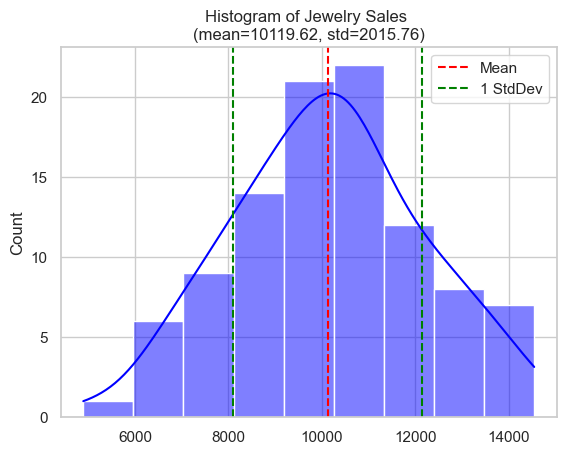

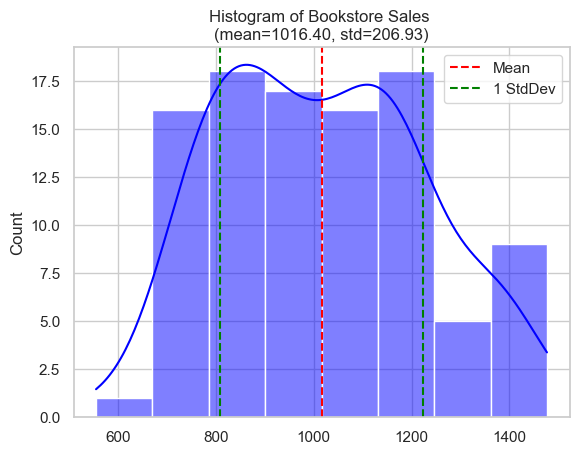

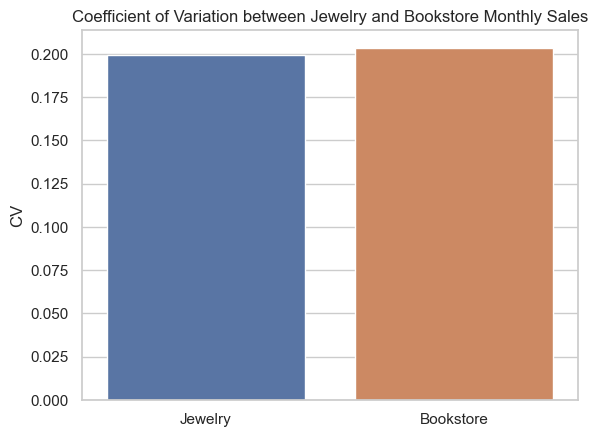

In [4]:
#| label: fig-ex1

fig, ax = plt.subplots()
sns.histplot(jewelry_sales, kde=True, ax=ax, color="blue")
ax.axvline(mean_jewelry, color="red", linestyle="--", label=f"Mean")
ax.axvline(mean_jewelry - std_jewelry, color="green", linestyle="--", label="1 StdDev")
ax.axvline(mean_jewelry + std_jewelry, color="green", linestyle="--")
ax.set_title(f"Histogram of Jewelry Sales \n(mean={mean_jewelry:.2f}, std={std_jewelry:.2f})")
ax.legend()

fig, ax = plt.subplots()
sns.histplot(bookstore_sales, kde=True, ax=ax, color="blue")
ax.axvline(mean_bookstore, color="red", linestyle="--", label=f"Mean")
ax.axvline(mean_bookstore - std_bookstore, color="green", linestyle="--", label="1 StdDev")
ax.axvline(mean_bookstore + std_bookstore, color="green", linestyle="--")
ax.set_title(f"Histogram of Bookstore Sales \n(mean={mean_bookstore:.2f}, std={std_bookstore:.2f})")
ax.legend()

fig, ax = plt.subplots()
sns.barplot(x=['Jewelry', 'Bookstore'], y=[cv_jewelry, cv_bookstore], ax=ax)
ax.set_title("Coefficient of Variation between Jewelry and Bookstore Monthly Sales")
ax.set_ylabel("CV")

plt.show()

The jewelry shop's average sales and standard deviation are substantially larger than the bookstore's (mean of $10,119 and standard deviation of $2,015 compared to the mean of $1,016 with standard deviation of $206), yet their CVs are the same (20%).

This means that relative to their respective average sales, both the jewelry shop and the bookstore have the same relative variablity despite their huge differences in sale volumes (and their standard deviation).

This exemplifies the idea of CV as a relative measure of variability and shows how it can be applied to make comparisons between datasets of different scales.

### Scenario 2

Consider two datasets of employee ages from two firms.

Let's say:
- Company A (a startup): Younger workers, some elderly.
- Company B (a well-established): Older workers, some younger.

Let's generate sample data for both examples using Numpy.

In [5]:
#| label: data-ex2-qcd

np.random.seed(42) # Setting the seed for reproducibility

ages_company_A = np.random.normal(loc=25, scale=3, size=50)  # mean = 25 yrs, std = 3 yrs
ages_company_B = np.random.normal(loc=45, scale=5, size=50)  # mean = 45 yrs, std = 5 yrs

# Add a few outliers
ages_company_A = np.append(ages_company_A, [60, 62, 64])
ages_company_B = np.append(ages_company_B, [20, 22, 24])

# Compute Q1, Q3, and IQR, and QCD for both datasets
ages_company_A_q1, ages_company_A_q3 = np.percentile(ages_company_A, [25, 75])
ages_company_A_iqr = ages_company_A_q3 - ages_company_A_q1  # IQR = Q3 - Q1
ages_company_B_q1, ages_company_B_q3 = np.percentile(ages_company_B, [25, 75])
ages_company_B_iqr = ages_company_B_q3 - ages_company_B_q1

ages_company_A_qcd = calc_qcd(ages_company_A)
ages_company_B_qcd = calc_qcd(ages_company_B)

print(
  f"Company A: \n\t- Q1 = {ages_company_A_q1:.3f} years"
  f"\n\t- Q3 = {ages_company_A_q3:.3f} years"
  f"\n\t- IQR = {ages_company_A_iqr:.3f} years"
  f"\n\t- QCD = {ages_company_A_qcd:.3f} (dimensionless)"
)
print(
  f"Company B: \n\t- Q1 = {ages_company_B_q1:.3f} years"
  f"\n\t- Q3 = {ages_company_B_q3:.3f} years"
  f"\n\t- IQR = {ages_company_B_iqr:.3f} years"
  f"\n\t- QCD = {ages_company_B_qcd:.3f} (dimensionless)"
)

Company A: 
	- Q1 = 22.840 years
	- Q3 = 26.490 years
	- IQR = 3.650 years
	- QCD = 0.074 (dimensionless)
Company B: 
	- Q1 = 42.351 years
	- Q3 = 47.566 years
	- IQR = 5.215 years
	- QCD = 0.058 (dimensionless)


Now, let's plot the distribution of the data along with the boxplot and QCD to visualise the information above. 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


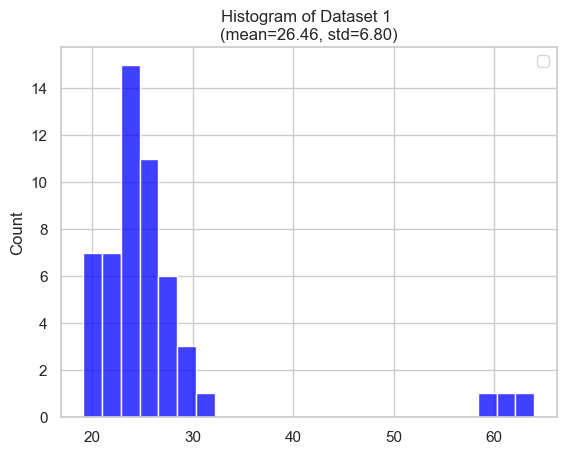

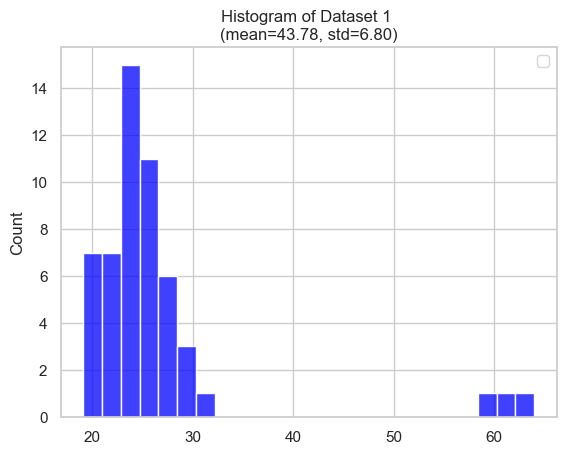

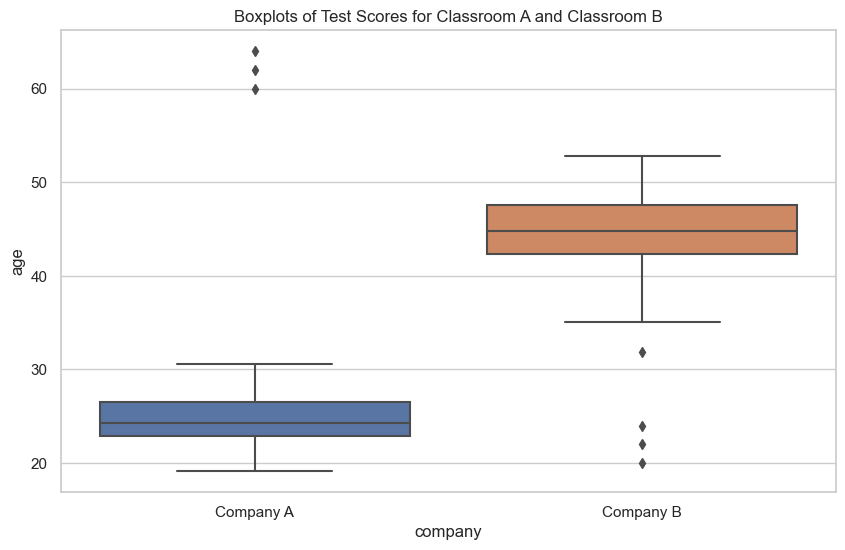

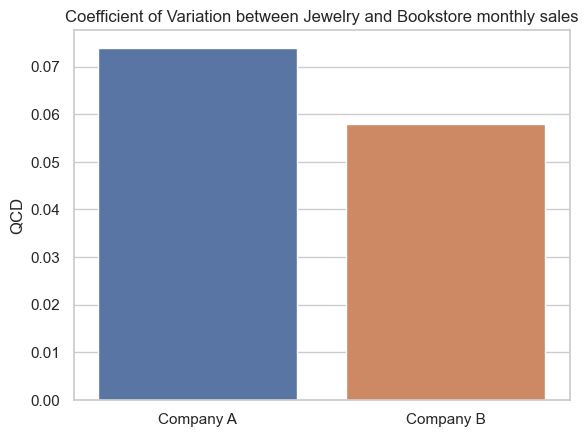

In [6]:
#| label: fig-ex2
#| code-fold: true
#| fig-cap: Studying the dispersion between ages of employees in Companies A and B based on robust measure of IQR.
#| fig-subcap:
#|   - Distribution of age of employees in Company A
#|   - Distribution of age of employees in Company B
#|   - Boxplots of age of employees in both companies
#|   - Comparing Quantile Coefficient of Dispersion between two companies
#| layout-nrow: 2
#| layout:
#|   - - 45
#|     - -10
#|     - 45
#|   - - 45
#|     - -10
#|     - 45

fig, ax = plt.subplots()
sns.histplot(ages_company_A, ax=ax, color="blue")
ax.set_title(f"Histogram of Dataset 1 \n(mean={np.mean(ages_company_A):.2f}, std={np.std(ages_company_B):.2f})")
ax.legend()

fig, ax = plt.subplots()
sns.histplot(ages_company_A, ax=ax, color="blue")
ax.set_title(f"Histogram of Dataset 1 \n(mean={np.mean(ages_company_B):.2f}, std={np.std(ages_company_B):.2f})")
ax.legend()

import pandas as pd
df1 = pd.DataFrame(ages_company_A, columns=["age"])
df1["company"] = "Company A"
df2 = pd.DataFrame(ages_company_B, columns=["age"])
df2["company"] = "Company B"

# Create box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x="company", y="age", data=pd.concat([df1, df2]))
plt.title("Boxplots of Test Scores for Classroom A and Classroom B")

fig, ax = plt.subplots()
sns.barplot(x=["Company A", "Company B"], y=[ages_company_A_qcd, ages_company_B_qcd], ax=ax)
ax.set_title("Coefficient of Variation between Jewelry and Bookstore monthly sales")
ax.set_ylabel("QCD")

plt.show()

Company B's IQR (5.215 years vs. 3.65 years) suggests wider age dispersion. 
However, Company B's elderly staff affects this.

On the other hand, Company A has a larger QCD (0.074 vs. 0.058) than Company B, showing a greater age distribution variation relative to size. The IQR doesn't reveal this.

In the upcoming sections, we'll learn how to quantify this difference using the Coefficient of Variation and the Quartile Coefficient of Dispersion.

## Discussion 

Let's answer a few questions that you may think.

### Why not focus on measures like standard deviation or IQR?

We use standard deviation and IQR to quantify dispersion in datasets.
The standard deviation shows the average data point distance from the mean. The IQR shows the distribution of the middle 50% of our data.

However, these measures may be deceptive when comparing the dispersion of two or more datasets with different units or scales, skewed distributions, or in the presense of outliers.

While standard deviation and IQR are useful statistical tools, we occasionally require CV and QCD to conduct fair comparisons.

The CV and QCD both measure and compare variability, although they do it in somewhat different ways. Your data and desired variability determine which one to use. 

### When to use CV?
CV is a good way to compare the amount of variation in different datasets that have different sizes, units, or average values. Because the CV is a relative measure of spread, it shows how different things are from the mean.

The mean and standard deviation, two measures that are greatly affected by "outliers," are used to create the CV. So, the CV can give a distorted view of spread in datasets that aren't normally distributed or have outliers. Thus, CV works best with data that is evenly spread out and doesn't have any extreme values. 

In the sales case, the price ranges for these two groups are very different, so the scales used to measure their sales are also very different. The jewelry store is likely to have much higher average sales and much more variation.
If we used the standard deviation to measure how variable these two groups are, we might come to the wrong conclusion that the jewelry shop's sales are more variable. 

The CV allowed us to compare the variability of sales between the two datasets, regardless of their different scales. If the CV is higher for one category, it means that the sales are more variable relative to the average sales for that category.

### When to use QCD?
The QCD uses dataset quartiles, which are less outlier-sensitive. QCD is a robust dispersion measure for skewed distributions or datasets containing outliers. The QCD concentrates on the center 50% of the data, which may better capture dispersion in such datasets.

In our example, we examined the age differences between two companies: a startup company (A) with mostly younger employees, and a well-established company (B) with mostly elderly. Given their distinct age ranges, the median age and variability would be higher for the older company. Using the Interquartile Range (IQR) to compare dispersion might inaccurately suggest higher age variance in the established company, as IQR measures absolute variability and is higher for larger values.

The QCD is more effective as it standardizes variability against the median, enabling us to compare age variability between companies on different scales. A higher QCD indicates greater age variance relative to the median for that company. Therefore, the QCD was chosen for this comparison as it accounts for different scales and potential data skew or outliers.

### Takeaways 
Choosing between CV and QCD depends on the nature of your dataset and analysis goals. 
Below are key points about both measures:

- **Coefficient of Variation (CV)**
  - CV is calculated as the ratio of the standard deviation to the mean.
  - CV is dimensionless.
  - Higher CV indicates greater variability relative to the mean.
  - CV could give misleading results if the mean is near zero (divising by zero!).

- **Quartile Coefficient of Dispersion (QCD)**
  - QCD is based on quartiles. 
  - QCD is a robust measure (less sensitive to extreme values).
  - QCD is dimensionless.
  - Higher QCD indicates higher variability of values relative to the median.
  - QCD does not fully capture the spread if the distribution's tails are important. 


## Conclusion

To sum up, the Coefficient of Variation (CV) and the Quartile Coefficient of Dispersion (QCD) are crucial statistics for examining dispersion in numerical data. CV excels at comparing scaled data, while QCD helps in case of skewed or outlier datasets. 
We looked at two cases (with Python programs and analysis) to see how this works in practice.
By using them wisely, we may get useful information for making decisions.

:::{.callout-tip icon=false}
# AI Sprout Newsletter
I  curate a weekly newsletter called 🌱 [AI Sprout](https://aisprout.beehiiv.com/subscribe) where I provide hands-on reviews and analysis of the latest AI tools and innovations. Subscribe to explore emerging AI with me!

Let’s connect on [LinkedIn](https://www.linkedin.com/in/alizadehesmaeil/) and [Twitter](https://twitter.com/es_alizadeh) 🤝
:::